In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50, EfficientNetB0, MobileNetV2
import numpy as np
import pickle
import matplotlib.pyplot as plt

# ... (previous code)


# Build a ResNet model
def build_resnet_model():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    base_model.trainable = False  # Freeze the pre-trained layers

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10)
    ])

    return model

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50, EfficientNetB0, MobileNetV2
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
# Function to unpickle the CIFAR-10 dataset
def unpickle(file):
    with open(file, 'rb') as fo:
        data = pickle.load(fo, encoding='bytes')
    return data

# Load training and test data
def load_cifar10_data():
    train_data = []
    train_labels = []
    for i in range(1, 6):
        batch = unpickle(f'data_batch_{i}')
        train_data.extend(batch[b'data'])
        train_labels.extend(batch[b'labels'])

    test_batch = unpickle('test_batch')
    test_data = test_batch[b'data']
    test_labels = test_batch[b'labels']

    return np.array(train_data), np.array(train_labels), np.array(test_data), np.array(test_labels)

In [3]:
# Preprocess the data
def preprocess_data(train_data, test_data):
    # Normalize pixel values to be between 0 and 1
    train_data = train_data / 255.0
    test_data = test_data / 255.0

    # Reshape the data to (32, 32, 3) for image dimensions
    train_data = train_data.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
    test_data = test_data.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

    return train_data, test_data

# Build a simple CNN model
def build_cnn_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10))

    return model


In [4]:
# Train and evaluate the model
def train_and_evaluate_model(model, train_data, train_labels, test_data, test_labels):
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    model.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))
    test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)
    print(f'\nTest accuracy: {test_acc}')

# Plot specific images by class name
def plot_images_by_class(images, labels, class_name, num_images=5):
    class_indices = np.where(np.array(label_names) == class_name)[0]
    selected_indices = np.random.choice(class_indices, num_images, replace=False)

    plt.figure(figsize=(10, 2))
    for i, index in enumerate(selected_indices):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[index])
        plt.title(f'Class: {label_names[labels[index]]}')
        plt.axis('off')
    plt.show()

C:\Users\rajab\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 17ms/step - accuracy: 0.3532 - loss: 1.7484 - val_accuracy: 0.5477 - val_loss: 1.2316
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.5708 - loss: 1.1963 - val_accuracy: 0.6162 - val_loss: 1.0845
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.6393 - loss: 1.0186 - val_accuracy: 0.6430 - val_loss: 1.0034
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.6812 - loss: 0.9053 - val_accuracy: 0.6519 - val_loss: 1.0158
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.7011 - loss: 0.8370 - val_accuracy: 0.6908 - val_loss: 0.8953
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.7272 - loss: 0.7807 - val_accuracy: 0.6979 - val_loss: 0.8810
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.7469 - loss: 0.7220 - val_accuracy: 0.6931 - val_loss: 0.8931
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.7621 -

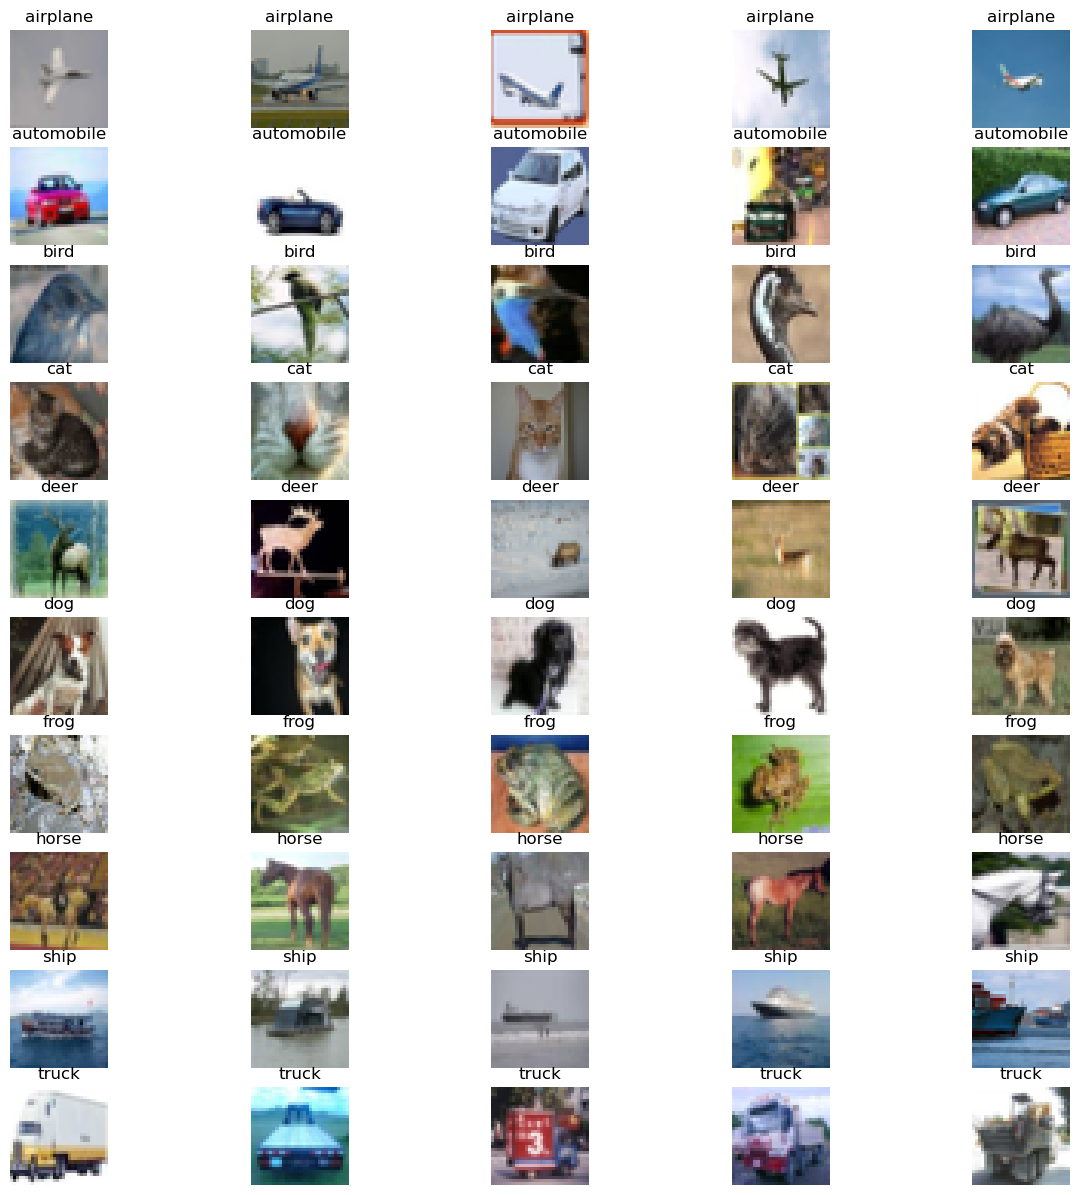

In [6]:
# Plot specific images by class name
def plot_images_by_classes(images, labels, class_names, num_images_per_class=5):
    plt.figure(figsize=(15, 15))

    for i, class_name in enumerate(class_names):
        class_index = label_names.index(class_name.encode('utf-8'))
        class_indices = np.where(labels == class_index)[0]
        selected_indices = np.random.choice(class_indices, num_images_per_class, replace=False)

        for j, index in enumerate(selected_indices):
            plt.subplot(10, num_images_per_class, i * num_images_per_class + j + 1)
            plt.imshow(images[index])
            plt.title(class_name)
            plt.axis('off')

    plt.show()

# Main program
if __name__ == "__main__":
    # Load CIFAR-10 data
    train_data, train_labels, test_data, test_labels = load_cifar10_data()

    # Preprocess the data
    train_data, test_data = preprocess_data(train_data, test_data)

    # Build the CNN model
    model = build_cnn_model()

    # Train and evaluate the model
    train_and_evaluate_model(model, train_data, train_labels, test_data, test_labels)

    # Plot 5 images for each of the 10 classes with class names displayed
    label_names = unpickle('batches.meta')[b'label_names']
    class_names = [name.decode('utf-8') for name in label_names]
    plot_images_by_classes(test_data, test_labels, class_names, num_images_per_class=5)


In [7]:
# Build a ResNet model
def build_resnet_model():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    base_model.trainable = False  # Freeze the pre-trained layers

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10)
    ])

    return model

In [8]:
if __name__ == "__main__":
    # ... (previous code)

    # Build the ResNet model
    resnet_model = build_resnet_model()
    print("\nTraining and evaluating ResNet model:")
    train_and_evaluate_model(resnet_model, train_data, train_labels, test_data, test_labels)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1137s 12us/step

Training and evaluating ResNet model:
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1282s 817ms/step - accuracy: 0.1997 - loss: 2.1731 - val_accuracy: 0.3008 - val_loss: 1.9082
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 182s 116ms/step - accuracy: 0.3063 - loss: 1.9033 - val_accuracy: 0.3392 - val_loss: 1.8305
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 192s 123ms/step - accuracy: 0.3306 - loss: 1.8421 - val_accuracy: 0.3648 - val_loss: 1.7922
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 188s 121ms/step - accuracy: 0.3482 - loss: 1.8033 - val_accuracy: 0.3513 - val_loss: 1.7942
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 178s 114ms/step - accuracy: 0.3642 - loss: 1.7694 - val_accuracy: 0.3414 - val_loss: 1.8500
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 222s 142ms/step - accuracy: 0.3689 - loss: 1.7538 - val_accuracy: 0.3525 - val_loss: 1.7841
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 154s 98ms/step - accuracy: 0.3742 - loss: 1.7449 - val_accu


Plotting images with predictions using ResNet model:
313/313 ━━━━━━━━━━━━━━━━━━━━ 46s 122ms/step


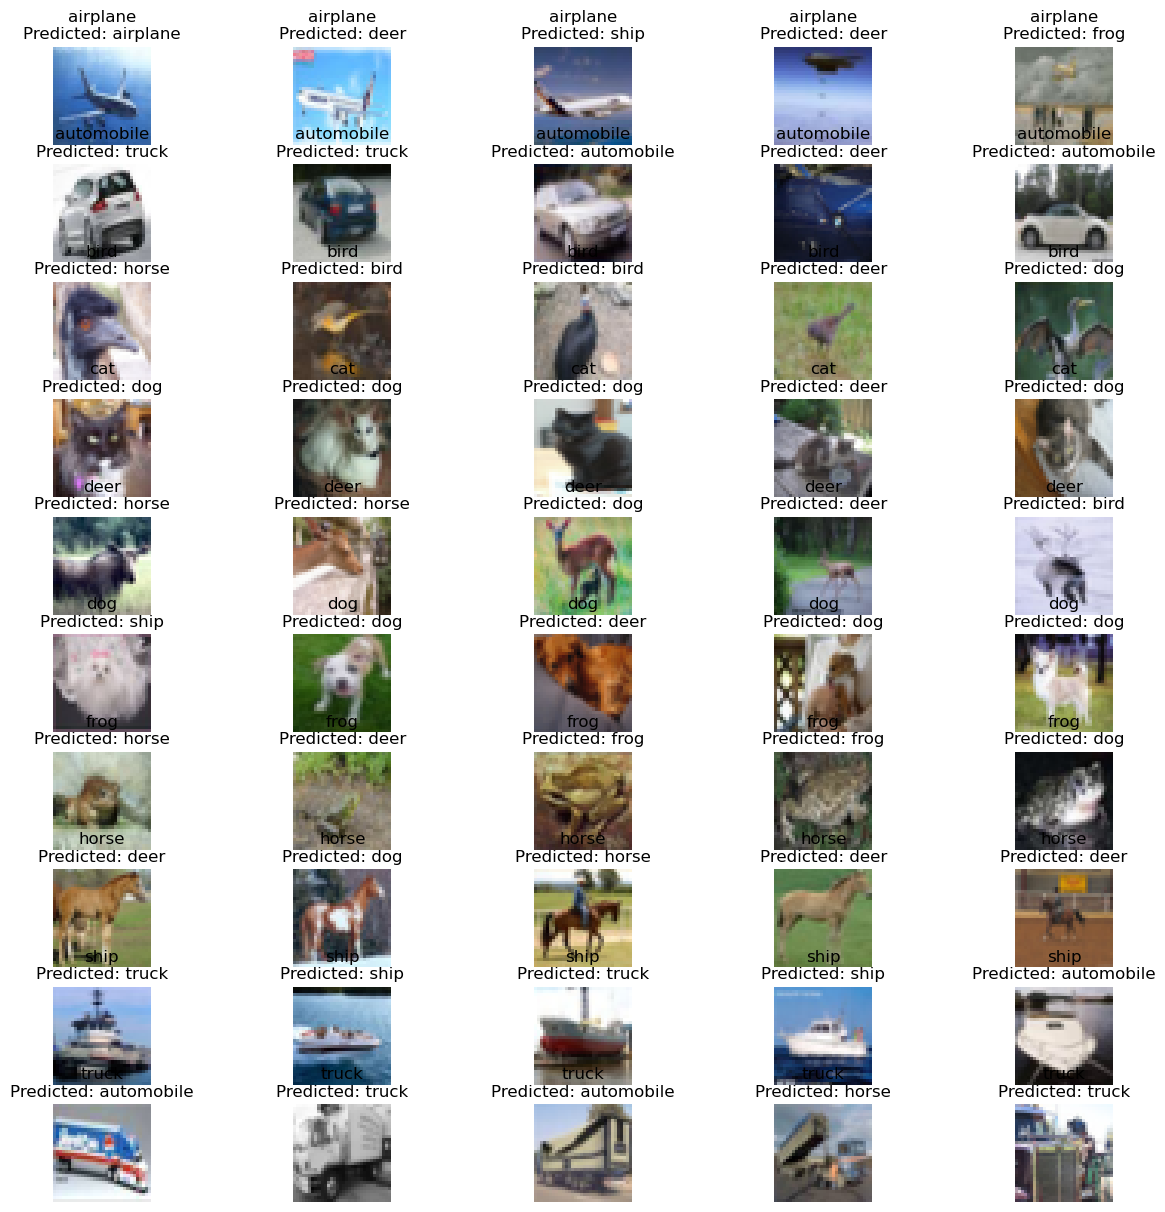

In [9]:
# ... (previous code)

def plot_images_with_predictions(model, images, labels, class_names, num_images_per_class=5):
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)

    plt.figure(figsize=(15, 15))

    for i, class_name in enumerate(class_names):
        class_index = label_names.index(class_name.encode('utf-8'))
        class_indices = np.where(labels == class_index)[0]
        selected_indices = np.random.choice(class_indices, num_images_per_class, replace=False)

        for j, index in enumerate(selected_indices):
            plt.subplot(10, num_images_per_class, i * num_images_per_class + j + 1)
            plt.imshow(images[index])
            plt.title(f'{class_name}\nPredicted: {class_names[predicted_labels[index]]}')
            plt.axis('off')

    plt.show()

# ... (previous code)

if __name__ == "__main__":
    # ... (previous code)

    # Plot images with predictions using ResNet model
    print("\nPlotting images with predictions using ResNet model:")
    plot_images_with_predictions(resnet_model, test_data, test_labels, class_names, num_images_per_class=5)
